In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV

In [2]:
df_tr_1 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph1_bytime.csv", encoding='cp949')
df_ts_1 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph2_in.csv", encoding='cp949')
df_ts_2 = pd.read_csv("C:/Users/User/github/data/TFTLCD/ph2_out.csv", encoding='cp949')

In [3]:
df_tr = df_tr_1.replace('Normal', 0)
df_ts_1 = df_ts_1.replace('정상', 0)
df_ts_1 = df_ts_1.replace('이상', 1)
df_ts_2 = df_ts_2.replace('정상', 0)
df_ts_2 = df_ts_2.replace('이상', 1)

In [4]:
df_tr_1 = df_tr_1.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})
df_ts_1 = df_ts_1.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})
df_ts_2 = df_ts_2.rename(columns={'추가정보_정상.이상여부':'Normal/Abnormal'})

In [5]:
df_tr = df_tr_1.iloc[:, 7:49] # train
df_ts = pd.concat([df_ts_1.iloc[:,7:49], df_ts_2.iloc[:,7:49]])
df_tr_x = df_tr.iloc[:,:-1]
df_ts_x = df_ts.iloc[:,:-1]

In [6]:
df_tr_x = df_tr_x.reset_index(drop = True)
df_tr_x = np.array(df_tr_x)
df_ts_x = df_ts_x.reset_index(drop = True)
df_ts_x = np.array(df_ts_x)

In [7]:
clf = LocalOutlierFactor(n_neighbors=10, contamination=0.5)

In [107]:
param_grid = {'n_neighbors' : [5,6,7,8,9,10,11,12,13,14,15], 'contamination' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],}

In [104]:
clf = LocalOutlierFactor()

In [114]:
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=param_grid,
                           scoring='accuracy', 
                           n_jobs=-1, 
                           verbose=2
                          )

In [116]:
grid_search.fit(df_tr_x)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(estimator=LocalOutlierFactor(), n_jobs=-1,
             param_grid={'contamination': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                         15]},
             scoring='accuracy', verbose=2)

In [117]:
grid_search.best_params_

{'contamination': 0.1, 'n_neighbors': 5}

In [118]:
clf2 = LocalOutlierFactor(n_neighbors=5, contamination=0.1)

In [120]:
clf2.fit(df_tr_x)

LocalOutlierFactor(contamination=0.1, n_neighbors=5)

In [121]:
clf2.fit_predict(df_ts_x)

array([1, 1, 1, ..., 1, 1, 1])

In [122]:
x_score = clf2.negative_outlier_factor_

(-6.0, 0.5)

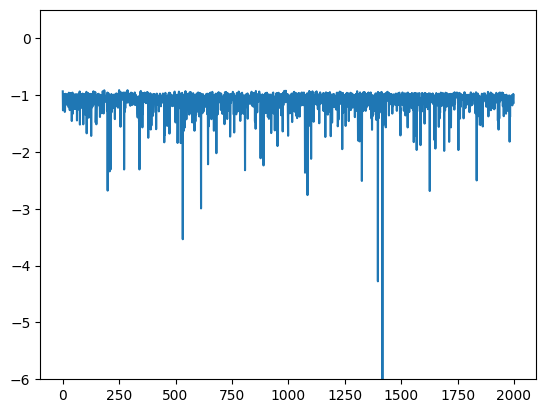

In [123]:
plt.plot(x_score)
plt.ylim(-6,0.5)

In [124]:
x_score_1 = abs(x_score)

(0.0, 6.0)

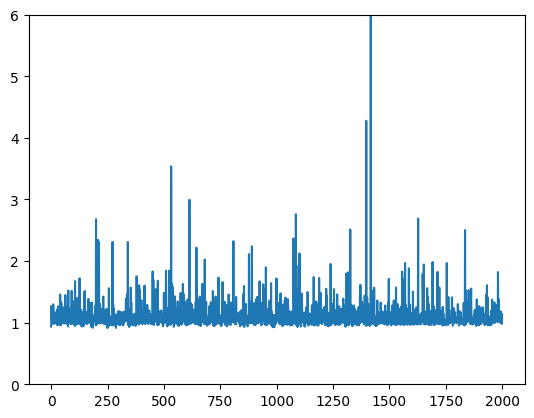

In [125]:
plt.plot(x_score_1)
plt.ylim(0,6)

In [126]:
from collections import Counter

In [128]:
alpha = []
beta = []
for i in range(0,5000,1):
    i = i/1000
    q = np.where(x_score_1[0:1000] > i)
    q = np.array(q).size
    w = np.where(x_score_1[1000:2000] < i)
    w = np.array(w).size
    alpha.append(q)
    beta.append(w)


In [129]:
len(alpha)

5000

In [130]:
np.array(alpha)/1000

array([1., 1., 1., ..., 0., 0., 0.])

In [131]:
np.array(beta)/1000

array([0.   , 0.   , 0.   , ..., 0.999, 0.999, 0.999])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


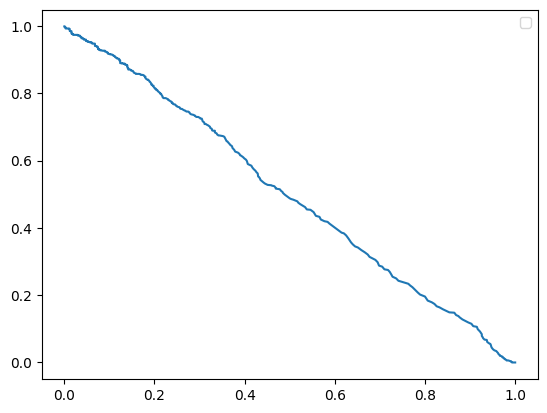

In [132]:
plt.plot(np.array(alpha)/1000,np.array(beta)/1000)
plt.show()

In [77]:
for i in range(0,500,1):
    if(alpha[i] - beta[i] == 0):
        print(i)
    

In [47]:
np.array(q).size

35

In [ ]:
np.where(x_score_1[1:1001] > 1.5) # 정상분류

In [25]:
np.where(x_score_1[1000:2001] >1.5)

(array([ 74,  76,  85, 101, 112, 188, 194, 220, 222, 239, 254, 309, 326,
        369, 397, 401, 417, 424, 432, 497, 556, 567, 569, 583, 586, 604,
        627, 652, 673, 691, 713, 721, 754, 835, 887, 955, 981], dtype=int64),)